In [1]:
from scipy.stats import binom 

In [8]:
n = 2 # número de lançamentos da moeda
p = 0.5 # probabilidade de sucesso
k = 1 # quantidade de sucessos obtidos após dois lançamentos

"""
binom.pmf(k,n,p): probabilidade de se obter um sucesso após dois lançamentos
de uma moeda, cuja probabilidade de sucesso é igual a p
"""

binom.pmf(k,n,p) # probabilidade de se obter um sucesso após dois lançamentos 

0.5

In [9]:
import numpy as np

ks = np.arange(n+1) # array com inteiros entre 0 e 2
ps = binom.pmf(ks,n,p) # array com as probabilidades de sucesso
ps

array([0.25, 0.5 , 0.25])

In [10]:
from empiricaldist import Pmf

"""
Pmf(ps,ks): DataFrame com a distribuição de probabilidades dos valores de ks, que
é representado pelo array ps. Pmf transforma ks em objeto Index.
"""

pmf_k = Pmf(ps,ks) # DataFrame com a distribuição de probabilidades dos valore
pmf_k

,probs
0,0.25
1,0.50
2,0.25


In [11]:
from utils import set_pyplot_params
from utils import decorate
set_pyplot_params()

def make_binomial(n,p):
    """
    constrói uma binomial de parâmetros n e p, junto a dos objetos binom do
    scipy e Pmf do empiricaldist
    """
    ks = np.arange(n+1)
    ps = binom.pmf(ks,n,p)
    return Pmf(ps,ks)

### Qual é a probabilidade de se obter 140 ou mais caras em 250 lançamentos de uma moeda equilibrada?

In [24]:
# pmf_k ~ Binom(250,5)
pmf_k = make_binomial(250,0.5)

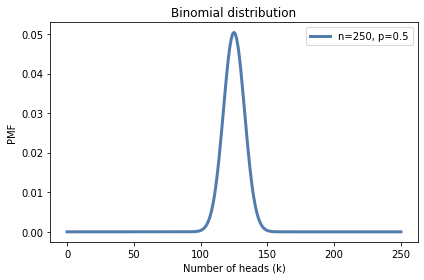

In [25]:
pmf_k.plot(label='n=250, p=0.5')

decorate(xlabel='Number of heads (k)',
         ylabel='PMF',
         title='Binomial distribution')

In [26]:
# número de sucessos mais provável de acontecer
pmf_k.max_prob()

125

In [27]:
# probabilidade relativa ao número de sucessos que é o máximo da distribuição
pmf_k[125]

0.05041221314731537

In [28]:
# probabilidade de se obter 140 sucessos em 250 lançamentos
pmf_k[140]

0.008357181724917673

In [32]:
# espaço amostral
pmf_k[pmf_k.qs >= 120]

120    4.130480e-02
121    4.437705e-02
122    4.692328e-02
123    4.883073e-02
124    5.001212e-02
           ...     
246    8.781685e-68
247    1.422135e-69
248    1.720325e-71
249    1.381787e-73
250    5.527148e-76
Name: , Length: 131, dtype: float64

In [33]:
# ge: greater or equal
def prob_ge(pmf,threshold):
    """
    Probabilidade de se obter um valor maior ou igual ao threshold
    P(x>= t)
    """
    # todos os valores acima do threshold (array booleano)
    ge = (pmf.qs >= threshold)
    
    # soma da probabilidade de todos esses elementos 
    ## função soma em objeto Series
    total = pmf[ge].sum()
    
    return total

In [34]:
# probabilidade de se obter 140 ou mais sucessos em 250 lançamentos de moeda
display(prob_ge(pmf_k,140),pmf_k.prob_ge(140))

0.033210575620022706

In [36]:
"""
obter 140 sucessos ou mais é equivalente a obter 110 sucessos ou menos, então
também devemos calcular essas probabilidades
"""
# le: least or equal
pmf_k.prob_le(110)

0.033210575620022706

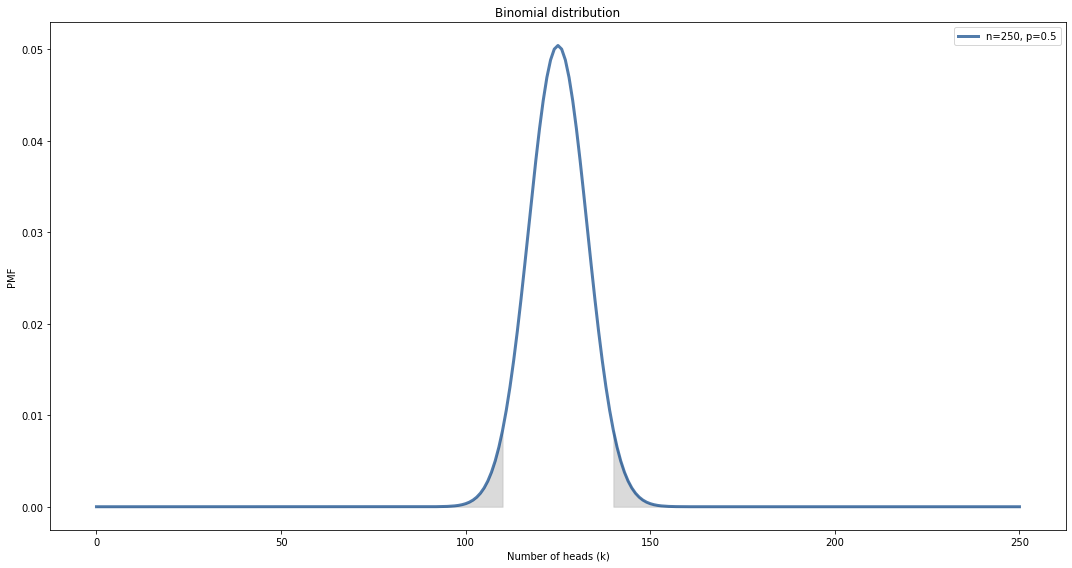

In [42]:
import matplotlib.pyplot as plt

def fill_below(pmf):
    qs = pmf.index
    ps = pmf.values
    plt.fill_between(qs, ps, 0, color='C5', alpha=0.4)

plt.figure(figsize=(15,8))
qs = pmf_k.index
fill_below(pmf_k[qs>=140])
fill_below(pmf_k[qs<=110])
pmf_k.plot(label='n=250, p=0.5')

decorate(xlabel='Number of heads (k)',
         ylabel='PMF',
         title='Binomial distribution')

In [37]:
# Probabilidade desejada
pmf_k.prob_le(110) + pmf_k.prob_ge(140)

0.06642115124004541

In [44]:
hypos = np.linspace(0,1,101)
prior = Pmf(1,hypos)
likelihood_heads = hypos
likelihood_tails = 1 - hypos
likelihood = {'H':likelihood_heads,
              'T':likelihood_tails}

# resultado de 250 lançamentos com 140 caras e 110 coroas
dataset = 'H'*140 + 'T'*110

In [45]:
def update_euro(pmf,dataset):
    """
    Atualização da distribuição a partir dos resultados 
    """
    for data in dataset:
        pmf *= likelihood[data]
    pmf.normalize()

In [47]:
posterior = prior.copy()
update_euro(posterior,dataset)

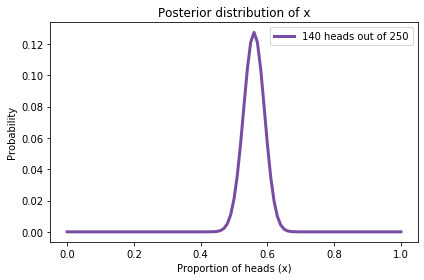

In [48]:
def decorate_euro(title):
    decorate(xlabel='Proportion of heads (x)',
             ylabel='Probability',
             title=title)
    
posterior.plot(label='140 heads out of 250', color='C4')
decorate_euro(title='Posterior distribution of x')